In [4]:
import numpy as np
import random
import time

# inference 预测模型y=wx+b

In [6]:
def inference(w,b,x):
    pred_y = w * x + b
    return pred_y


# cost function:L(w,b)

In [7]:
#cost function:L(w,b)
def eval_loss(w,b,x_list,gt_y_list):
    avg_loss = 0
    for i in range(len(x_list)):
        avg_loss += 0.5 * (w * x_list[i] + b - gt_y_list[i]) ** 2
    avg_loss /= len(gt_y_list)
    return avg_loss

# 梯度计算

In [8]:
#单一样本带来的梯度,gt是ground trust真实值的缩写。
def gradient(pred_y, gt_y, x):
    diff = pred_y - gt_y
    dw = diff * x   # 对w求导（梯度），因为是单一样本，故前面系数刚好是1
    db = diff       # 对b求导（梯度），因为是单一样本，故前面系数刚好是1
    return dw,db

# 由上面单一样本梯度计算batch size个数的样本带来的梯度

In [9]:
#batch_size个样本（batchsize）求得的w和b
def cal_step_gradient(batch_x_list, batch_gt_y_list, w, b ,lr):
    avg_dw, avg_db = 0, 0
    batch_size = len(batch_x_list)
    for i in range(batch_size):
        pred_y = inference(w, b, batch_x_list[i])
        dw, db = gradient(pred_y, batch_gt_y_list[i], batch_x_list[i])  
        avg_dw += dw
        avg_db += db
    avg_dw /= batch_size
    avg_db /= batch_size
    w -= lr * avg_dw
    b -= lr * avg_db
    return w,b

# 随机生成x_list和y_list数据集

In [10]:
def gen_sample_data():
    w = random.randint(0,10) + random.random()
    b = random.randint(0, 5) + random.random()
    
    num_sample = 100
    x_list = []
    y_list = []
    print(w,b)
    for i in range(num_sample):
        x = random.randint(0,100) * random.random()
        y = w * x + b + random.random() * random.randint(-1, 100)
        # random.random() * random.randint(-1, 100)这部分为噪声
        x_list.append(x)
        y_list.append(y)
        
    return x_list, y_list

3.6762265657308717 0.3531720030481512


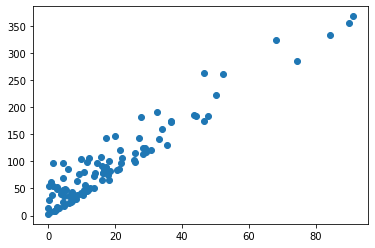

In [14]:
x_list, y_list = gen_sample_data()

import matplotlib.pyplot as plt

plt.figure()
plt.scatter(x_list, y_list)   # 画出x_list和y_list组成的散点图
plt.show()

# 对上面随机生成的数据集进行线性回归拟合，看w，b是否一致

In [15]:
def train(x_list, gt_y_list, batch_size, lr, max_iter):  
    # max_iter是迭代次数，batch_size表征的是从总体样本中抽取batch_size个子样本进行线性回归拟合
    # lr学习率learn rate也就是步长，一般取的很小
    w = 0
    b = 0
    num_samples = len(x_list)
    for i in range(max_iter):
        batch_idxs = np.random.choice(len(x_list), batch_size) 
        # 从x_list的长度中随机抽取batch_size个数赋给batch_idxs
        # 简单说随机生成的batch_idxs作为batch_x的角标
        batch_x = [x_list[j] for j in batch_idxs]
        # batch_x是x_list的一个子集，其包含数目是batch_size个数
        batch_y = [gt_y_list[j] for j in batch_idxs]
        # batch_y是gt_y_list的一个子集
        w, b = cal_step_gradient(batch_x, batch_y, w, b, lr)
        # w,b进行迭代梯度计算
        print('w:{0},b:{1}'.format(w,b))
        # format格式是将format（）中内容往前面传，即format（）括号中第1个给w，第2个给b
        print('loss is {}'.format(eval_loss(w,b,x_list,gt_y_list)))
        time.sleep(0.1)
        
    return w,b

In [19]:
train(x_list, y_list, 60, 0.001, 100)

w:3.3811303626557274,b:0.096152456273577
loss is 819.3359163816342
w:4.017173210209452,b:0.12759706987521163
loss is 479.9690321550599
w:4.320839180564928,b:0.1495492938590845
loss is 423.11457208814704
w:4.124183687043244,b:0.1584573751448386
loss is 451.7564356449555
w:4.448256708935971,b:0.17902608973603126
loss is 419.3145615757526
w:4.443785068423473,b:0.18762313888507673
loss is 419.1331749865728
w:4.1986939073029115,b:0.19728391777189763
loss is 436.8848464154328
w:4.443154566889797,b:0.2136587561876661
loss is 418.825250087934
w:4.346573399962008,b:0.2337183353013185
loss is 420.3358354884147
w:4.3345500853153505,b:0.24673163753035915
loss is 420.85791915776855
w:4.426959769600654,b:0.2614484294870024
loss is 418.0854385450369
w:4.4720349861059505,b:0.2739114630702892
loss is 418.97506555913765
w:4.628846440975624,b:0.2851758418398578
loss is 434.13600722384916
w:4.554307953111178,b:0.29484915697773806
loss is 424.52601296154506
w:4.528956279052773,b:0.30814470713131537
loss is

(4.530794025142698, 1.2988060711295735)